<a href="https://colab.research.google.com/github/maxencepenaud/Economic-Modeling-Sessions-13-14/blob/main/Economic_Modeling_session_13_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

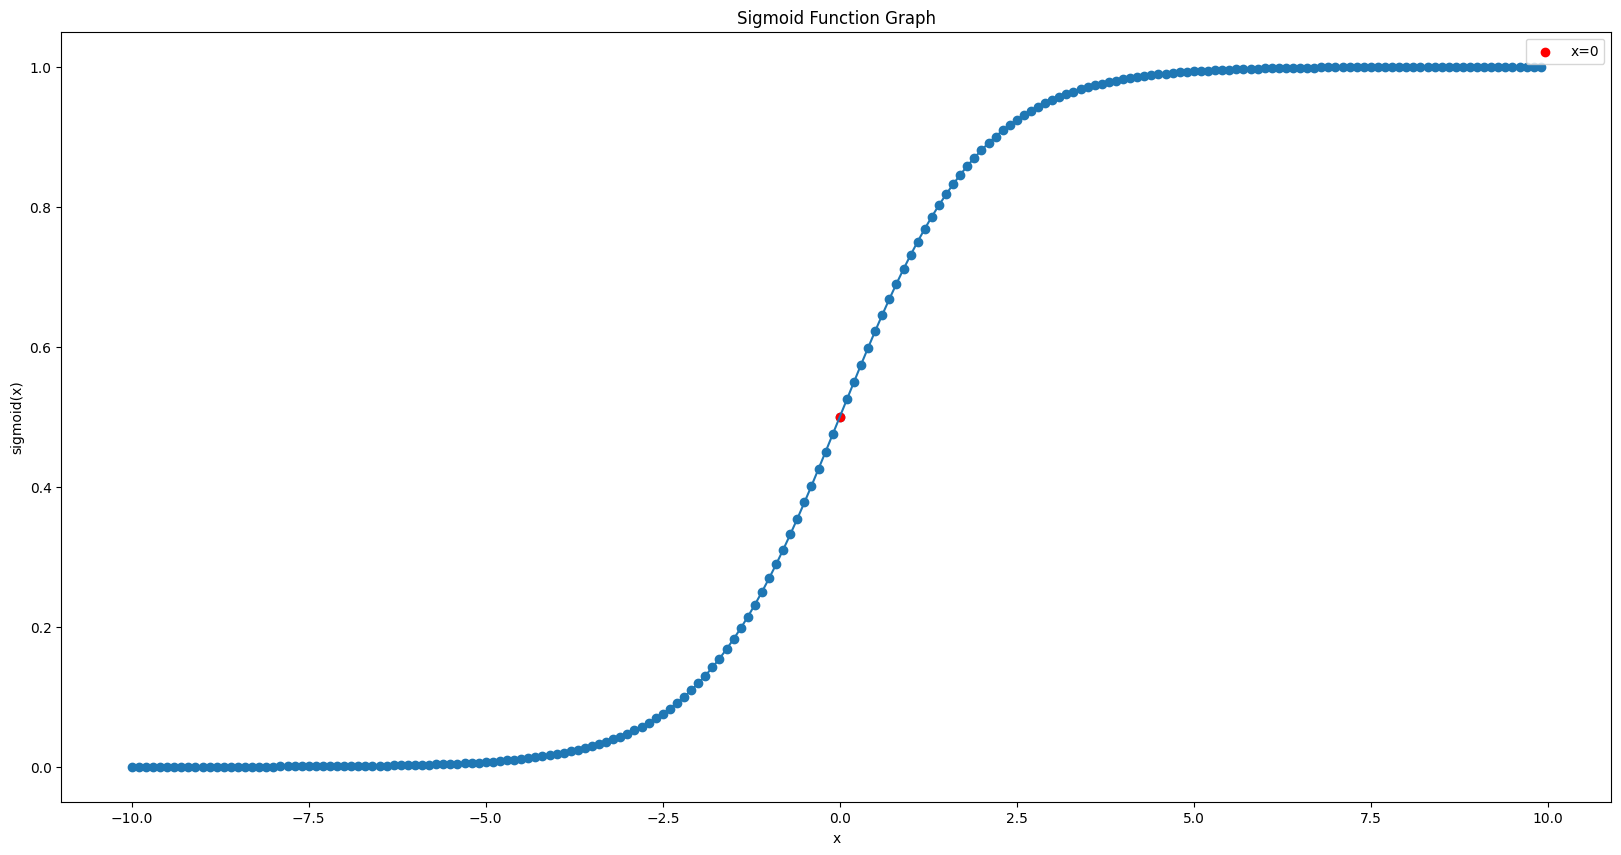

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function Graph")

# Place a marker on x=0
marker_x = 0
marker_y = 1 / (1 + np.exp(-marker_x))
plt.scatter(marker_x, marker_y, color='red', marker='o', label="x=0")

# Add a legend to the plot
plt.legend()

plt.show()

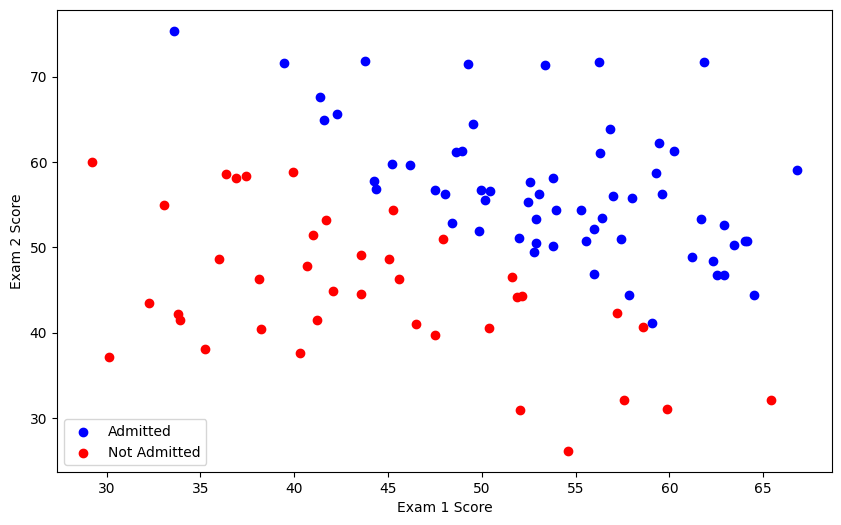

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
# np.random.seed(0)
x1 = np.random.normal(50, 10, 100)  # Exam 1 scores
x2 = np.random.normal(50, 10, 100)  # Exam 2 scores
X = np.vstack((x1, x2)).T

# Admission decisions (randomized for illustration)
y = (x1 + x2 > 100).astype(int)  # Admitted if the sum of scores is more than 100

# Scatter plot of the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(x1[y == 1], x2[y == 1], color='b', label='Admitted')
plt.scatter(x1[y == 0], x2[y == 0], color='r', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

In [ ]:
# Creating and training a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Display the model coefficients
beta_0 = model.intercept_[0]
beta_1, beta_2 = model.coef_.T
print(f'Intercept (beta_0): {beta_0}, beta_1: {beta_1}, beta_2: {beta_2}')

Intercept (beta_0): -130.69329589481313, beta_1: [1.31021006], beta_2: [1.29962849]


In [ ]:
# Now predic probabilities for some specific scores (test the result)
case1 = [[100, 100]]
p1 = model.predict_proba(case1)
print(f"for {case1} the odss of getting accepted are {p1[0][1]*100}%")

case2 = [[10, 10]]
p2 = model.predict_proba(case2)
print(f"for {case2} the odss of getting accepted are {p2[0][1]*100:.2f}%")

case3 = [[50, 50]]
p3 = model.predict_proba(case3)
print(f"for {case3} the odss of getting accepted are {p3[0][1]*100:.2f}%")

case4 = [[45, 45]]
p4 = model.predict_proba(case4)
print(f"for {case4} the odss of getting accepted are {p4[0][1]*100:.20f}%")


# verify using the actual calculation
z = beta_0 + 50 * beta_1 + 50 * beta_2
p = 1 / (1 + np.exp(-z))
print(f"{p[0]*100:.2f}")

for [[100, 100]] the odss of getting accepted are 100.0%
for [[10, 10]] the odss of getting accepted are 0.00%
for [[50, 50]] the odss of getting accepted are 44.98%
for [[45, 45]] the odss of getting accepted are 0.00017593564163612561%
44.98


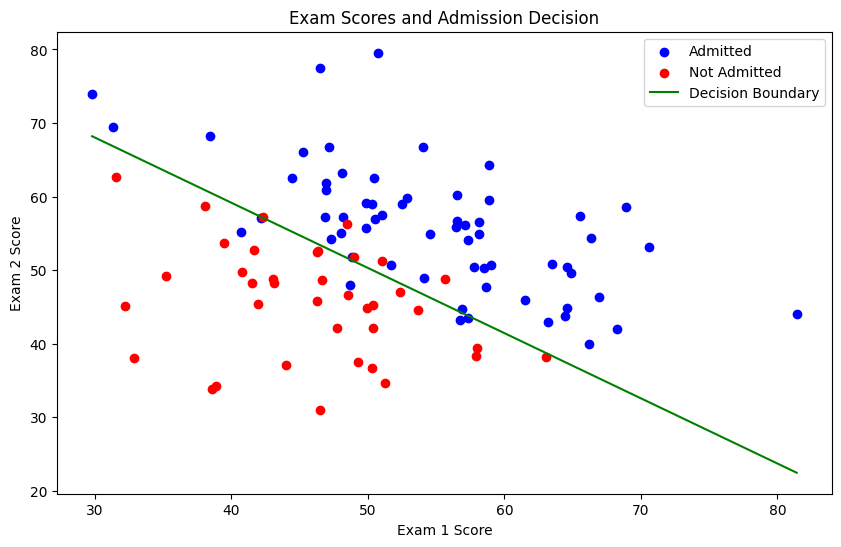

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
# np.random.seed(0)
x1 = np.random.normal(50, 10, 100)  # Exam 1 scores
x2 = np.random.normal(50, 10, 100)  # Exam 2 scores
X = np.vstack((x1, x2)).T

# Admission decisions (randomized for illustration)
noise = np.random.normal(0, 5, 100)
y = (x1 + x2 + noise > 100).astype(int)
# y = (x1 + x2 + np.random.randint(-10, 10) > 100).astype(int)  # Admitted if the sum of scores is more than 100

# Creating and training a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Decision boundary calculation
x_values = np.array([np.min(x1), np.max(x1)])
y_values = -(model.intercept_ + np.dot(model.coef_[0][0], x_values)) / model.coef_[0][1]

# Scatter plot of the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(x1[y == 1], x2[y == 1], color='b', label='Admitted')
plt.scatter(x1[y == 0], x2[y == 0], color='r', label='Not Admitted')

# Adding the decision boundary to the plot
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Exam Scores and Admission Decision')
plt.legend()
plt.show()

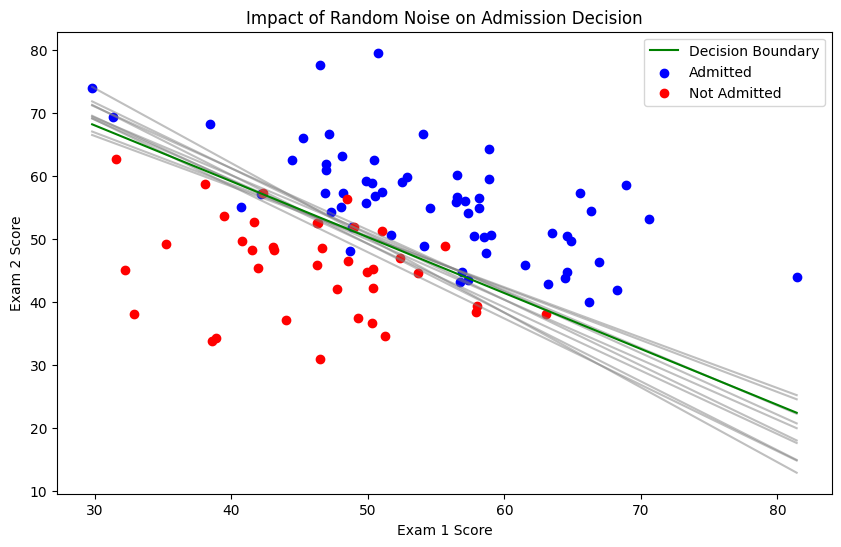

In [ ]:
plt.figure(figsize=(10, 6))
for _ in range(10):  # Plotting 10 different decision boundaries
    noise = np.random.normal(0, 5, 100)
    y_temp = (x1 + x2 + noise > 100).astype(int)
    model_temp = LogisticRegression().fit(X, y_temp)
    y_values_temp = -(model_temp.intercept_ + np.dot(model_temp.coef_[0][0], x_values)) / model_temp.coef_[0][1]
    plt.plot(x_values, y_values_temp, color='grey', alpha=0.5)  # Plot in grey with some transparency

# Adding the original decision boundary for comparison
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.scatter(x1[y == 1], x2[y == 1], color='b', label='Admitted')
plt.scatter(x1[y == 0], x2[y == 0], color='r', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Impact of Random Noise on Admission Decision')
plt.legend()
plt.show()

In [ ]:
import requests
x = requests.get("https://raw.githubusercontent.com/itb-ie/titanic/main/train.csv")
with open("sample_data/titanic.csv", "w") as f:
  f.write(x.text)

x = requests.get("https://raw.githubusercontent.com/itb-ie/titanic/main/test.csv")
with open("sample_data/titanic_test.csv", "w") as f:
  f.write(x.text)

x = requests.get("https://raw.githubusercontent.com/itb-ie/titanic/main/gender_submission.csv")
with open("sample_data/titanic_submission.csv", "w") as f:
  f.write(x.text)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_data = pd.read_csv('sample_data/titanic.csv')

# Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
# print(titanic_data)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
# print(titanic_data)

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

print(titanic_data)

# Separate features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)
print(y_pred)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

     Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3 -0.592481      1      0 -0.502445      True       False   
1           1       1  0.638789      1      0  0.786845     False       False   
2           1       3 -0.284663      0      0 -0.488854     False       False   
3           1       1  0.407926      1      0  0.420730     False       False   
4           0       3  0.407926      0      0 -0.486337      True       False   
..        ...     ...       ...    ...    ...       ...       ...         ...   
886         0       2 -0.207709      0      0 -0.386671      True       False   
887         1       1 -0.823344      0      0 -0.044381     False       False   
888         0       3  0.000000      1      2 -0.176263     False       False   
889         1       1 -0.284663      0      0 -0.044381      True       False   
890         0       3  0.177063      0      0 -0.492378      True        True   

     Embarked_S  
0        

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_data = pd.read_csv('sample_data/titanic.csv')
titanic_data.info()

# Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Separate features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Instantiate and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


LogisticRegression()

In [ ]:
titanic_data = pd.read_csv('sample_data/titanic_test.csv')
# Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)
id = titanic_data['PassengerId']

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

print(titanic_data.isnull().sum())
# Make predictions on the testing set
y_pred = log_reg.predict(titanic_data)
# print(y_pred, len(y_pred))
# print(id)
data = {"PassengerId": id, "survived": y_pred}
solution = pd.DataFrame(data)
solution.set_index(keys="PassengerId", inplace=True)
print(solution.shape)
solution.to_csv("sample_data/result.csv")

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
(418, 1)


[*********************100%%**********************]  1 of 1 completed


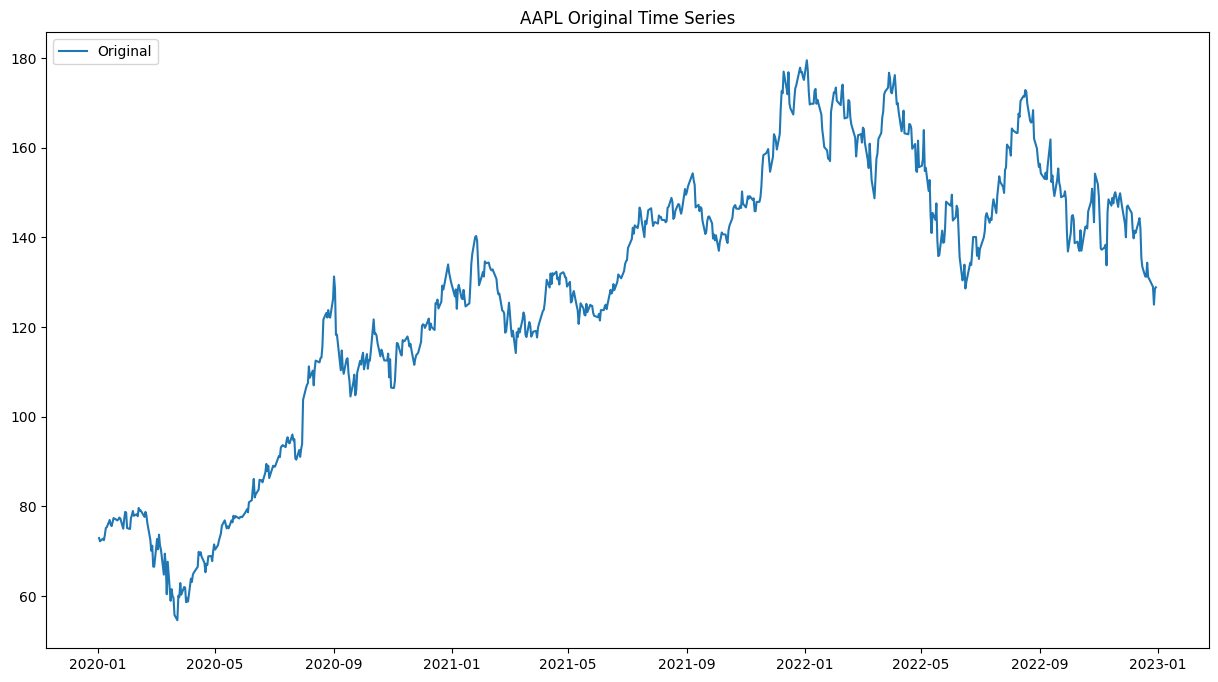

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Fetch Apple stock data from Yahoo Finance
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2022-12-31"

stock_data = yf.download(ticker, start=start_date, end=end_date)

# Use the 'Adj Close' prices for the analysis
data = stock_data['Adj Close']

plt.figure(figsize=(15, 8))

# Plot the original time series
plt.plot(data, label='Original')
plt.legend(loc='upper left')
plt.title(f'{ticker} Original Time Series')

# Show the plot
plt.show()

In [ ]:
sy = 2001
ey = 2023

In [ ]:
# load the segovia temperature data
import requests

url = "https://raw.githubusercontent.com/itb-ie/segovia/main/{}.csv"
for year in range(sy, ey):
  r = requests.get(url.format(year))
  with open(f"sample_data/{year}.csv", "w") as f:
    f.write(r.text)

In [ ]:
# since the 2009 year is not complete, replace it with 2008

df = pd.read_csv("sample_data/2008.csv")

# Assuming your date series is named 'date_series'
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert the series to datetime

df['DATE'] = df['DATE'][df['DATE'].map(lambda x: not (x.month == 2 and x.day == 29))]


# Replace the year 2008 with 2009, so that 2009 data is now the 2008 data
df['DATE'] = df['DATE'].map(lambda x: x.replace(year=2009))


# Convert the datetime series back to the original string format, handling NaT values
df['DATE'] = df['DATE'].map(lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else x)

df.to_csv("sample_data/2009.csv")

In [ ]:
# create one df
import pandas as pd

df = pd.DataFrame()
for year in range(sy, ey):
  df1 = pd.read_csv(f"sample_data/{year}.csv")
  df = pd.concat([df, df1])

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# round(2) to get only 2 decimals
df['TEMP_C'] = ((df['TEMP']-32)*5/9).round(2)
df['MAX_C'] = ((df['MAX']-32)*5/9).round(2)

df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,Unnamed: 0,TEMP_C,MAX_C
DATE,,,,,,,,,,,,,,,,,,,,,
2001-01-01,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",33.8,4,33.8,4,9999.9,...,,33.1,*,0.31,E,999.9,110000,NaN,1.00,1.61
2001-01-02,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",29.8,5,28.5,5,9999.9,...,,29.1,*,0.04,E,26.4,101000,NaN,-1.22,0.00
2001-01-03,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",30.8,5,30.5,5,9999.9,...,,27.0,,0.12,F,27.2,111000,NaN,-0.67,0.00
2001-01-04,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",34.7,5,26.0,5,9999.9,...,,31.3,*,0.20,E,26.4,110000,NaN,1.50,3.00
2001-01-05,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",40.4,5,40.4,5,9999.9,...,,33.8,,0.18,F,23.6,10000,NaN,4.67,5.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",39.9,24,32.1,24,9999.9,...,,36.3,,0.00,G,999.9,0,NaN,4.39,9.11
2022-12-28,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",39.0,24,27.1,24,9999.9,...,,35.6,*,0.00,G,999.9,1000,NaN,3.89,8.00
2022-12-29,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",38.4,24,37.4,24,9999.9,...,,36.1,,0.01,G,999.9,110000,NaN,3.56,5.22


<Axes: xlabel='DATE'>

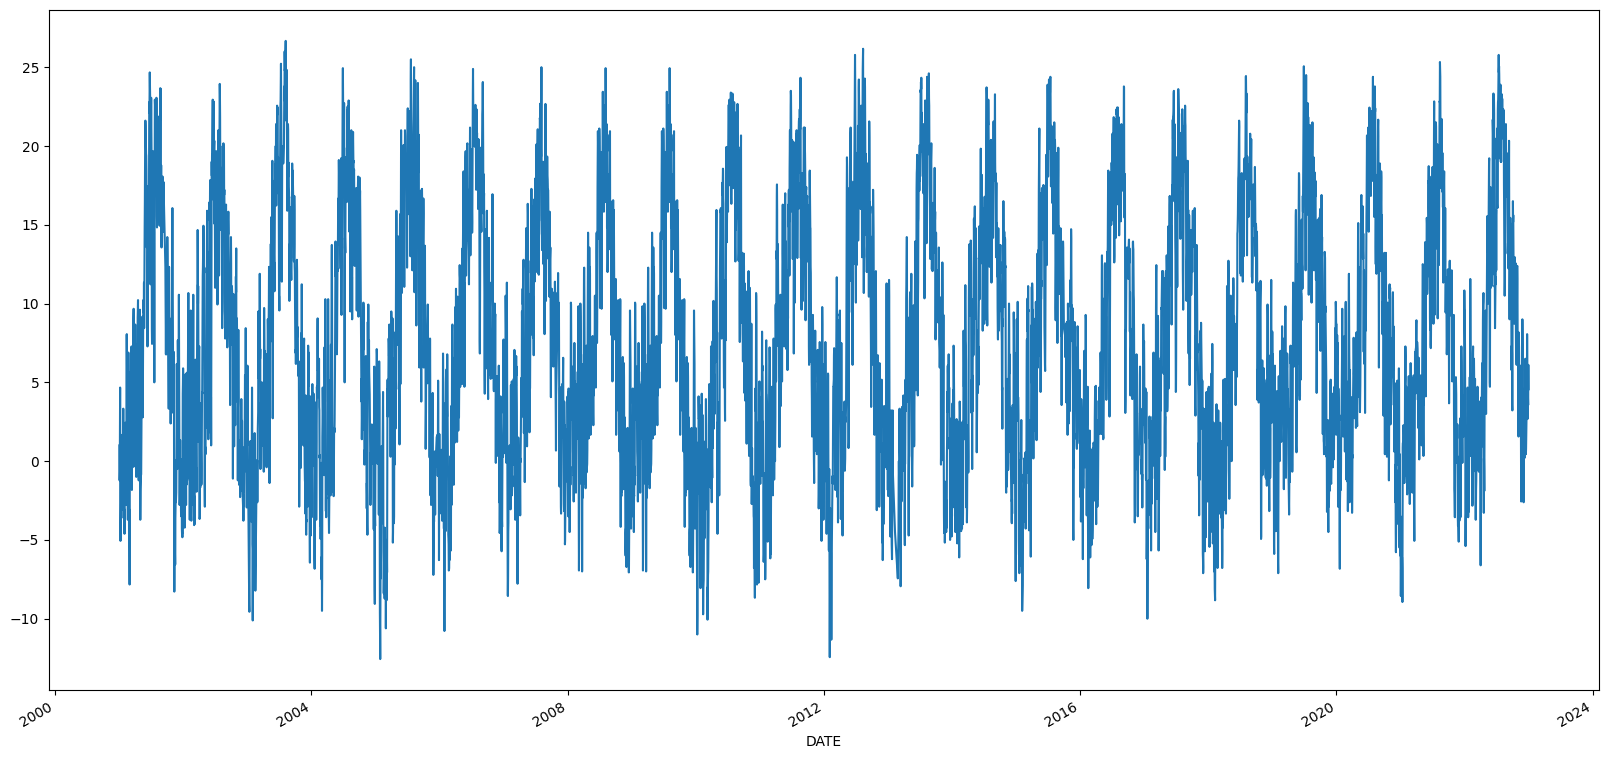

In [ ]:
# plot the graph
import matplotlib.pyplot as plt

df['TEMP_C'].plot(figsize=(20, 10))

In [ ]:
# Generate a complete date range for the same period
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max())

# Find the missing dates by calculating the difference between the complete date range and the DataFrame's index
missing_dates = complete_date_range.difference(df.index)

# Display the missing dates
print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex(['2001-03-09', '2001-04-27', '2001-05-02', '2001-05-04',
               '2001-05-09', '2001-05-16', '2001-05-19', '2001-05-24',
               '2001-05-31', '2001-06-01',
               ...
               '2016-04-16', '2018-09-17', '2019-11-01', '2019-11-02',
               '2019-11-03', '2021-02-11', '2021-02-12', '2021-02-20',
               '2021-02-21', '2022-11-16'],
              dtype='datetime64[ns]', length=291, freq=None)


In [ ]:
df = df.loc[df.index.dropna()]

# Assuming you have a DataFrame 'df' with a date-based index
index_series = pd.to_numeric(df.index)  # Convert the date-based index to a numeric format

is_increasing = index_series.is_monotonic_increasing

if not is_increasing:
    for idx in range(1, len(index_series)):
        if index_series[idx] < index_series[idx - 1]:
            print(f"Index {idx} ({df.index[idx]}) is causing the monotonicity issue (decreasing).")

else:
    print("The index is monotonic.")

The index is monotonic.


In [ ]:
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max())

# Reindex the DataFrame with the complete date range and forward fill the missing values
data_filled = df.reindex(complete_date_range, method='ffill')

# Display the updated DataFrame with missing dates filled
data_filled

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,Unnamed: 0,TEMP_C,MAX_C
2001-01-01,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",33.8,4,33.8,4,9999.9,...,,33.1,*,0.31,E,999.9,110000,NaN,1.00,1.61
2001-01-02,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",29.8,5,28.5,5,9999.9,...,,29.1,*,0.04,E,26.4,101000,NaN,-1.22,0.00
2001-01-03,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",30.8,5,30.5,5,9999.9,...,,27.0,,0.12,F,27.2,111000,NaN,-0.67,0.00
2001-01-04,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",34.7,5,26.0,5,9999.9,...,,31.3,*,0.20,E,26.4,110000,NaN,1.50,3.00
2001-01-05,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",40.4,5,40.4,5,9999.9,...,,33.8,,0.18,F,23.6,10000,NaN,4.67,5.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",39.9,24,32.1,24,9999.9,...,,36.3,,0.00,G,999.9,0,NaN,4.39,9.11
2022-12-28,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",39.0,24,27.1,24,9999.9,...,,35.6,*,0.00,G,999.9,1000,NaN,3.89,8.00
2022-12-29,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",38.4,24,37.4,24,9999.9,...,,36.1,,0.01,G,999.9,110000,NaN,3.56,5.22
2022-12-30,8215099999,40.8,-4.016667,1888.0,"NAVACERRADA PUERTO, SP",43.0,24,38.4,24,9999.9,...,,37.9,,0.13,G,999.9,10000,NaN,6.11,8.72


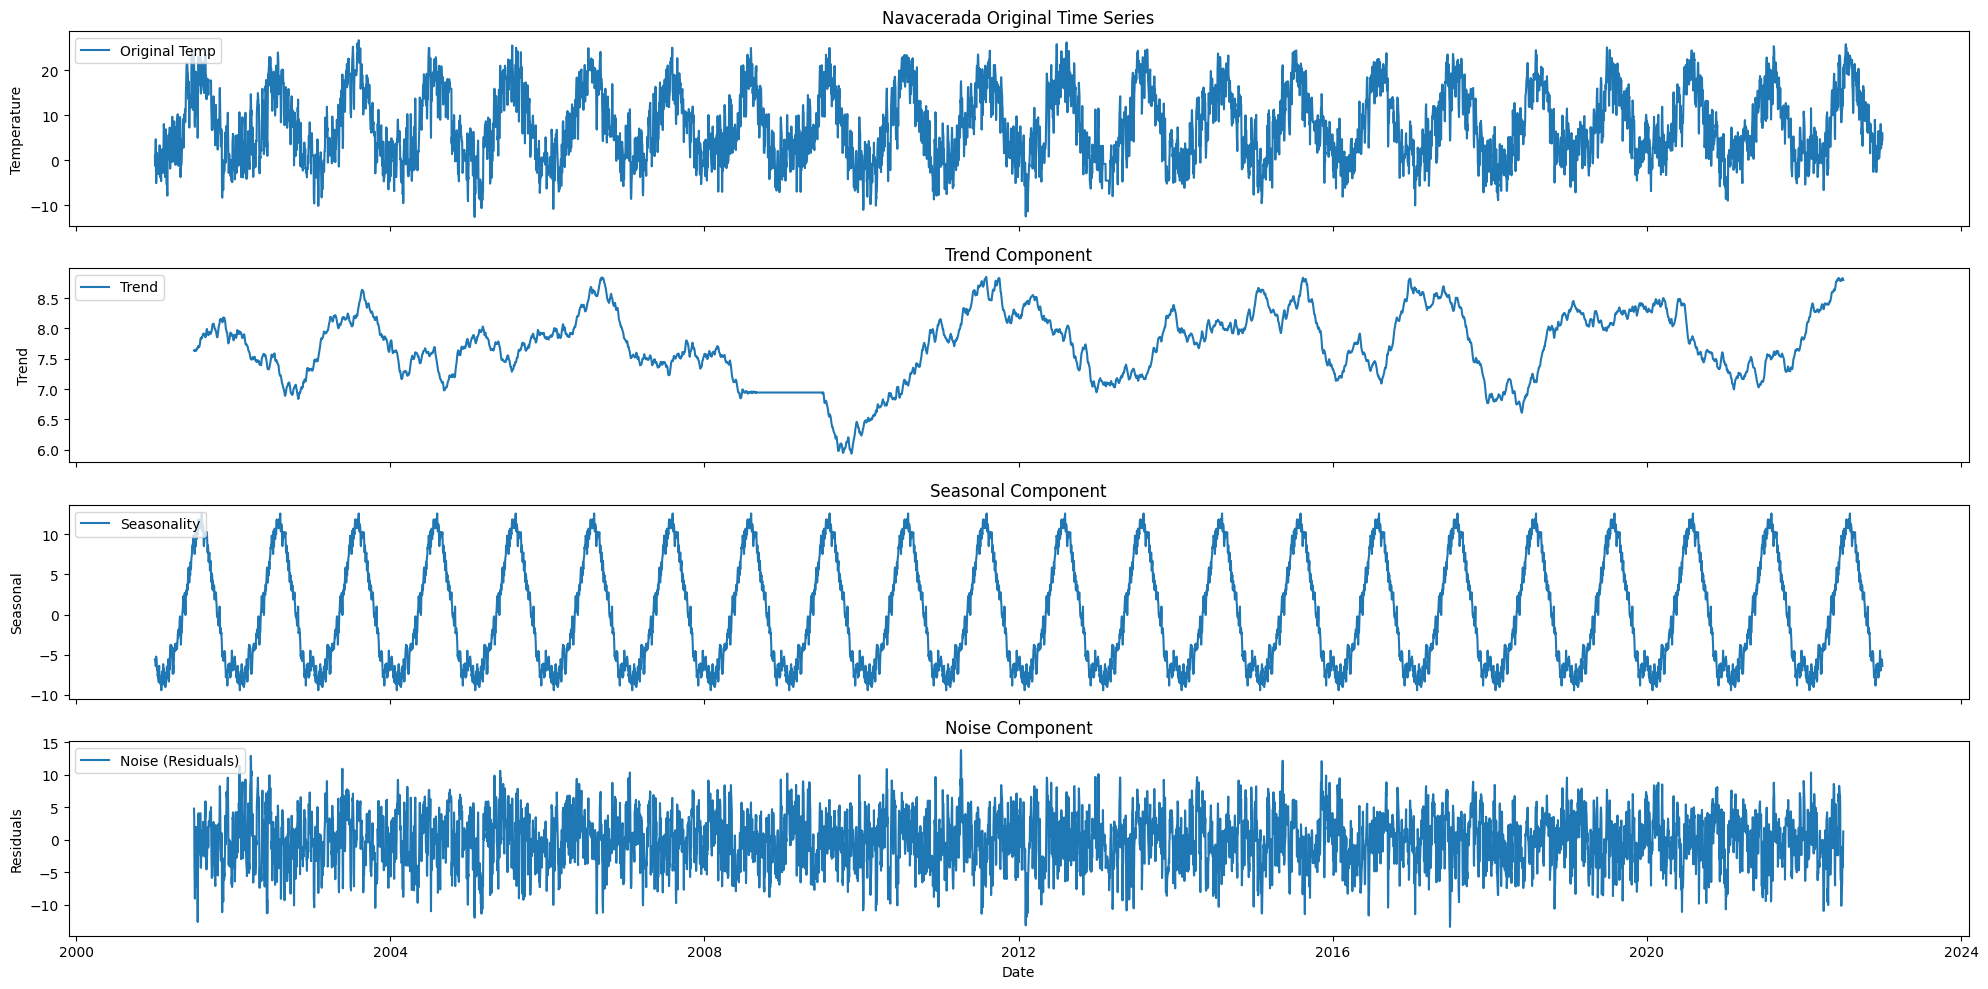

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = data_filled['TEMP_C'].copy()

# Perform seasonal decomposition on the stock price data (assuming no seasonality in this example)
decomposition = seasonal_decompose(data, model='additive', period=365)

# Create the plots using only matplotlib.pyplot
fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

# Plot the original time series
axes[0].plot(decomposition.observed, label='Original Temp')
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Temperature')
axes[0].set_title(f'Navacerada Original Time Series')

# Plot the trend component
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Trend')
axes[1].set_title(f'Trend Component')

# Plot the seasonality
axes[2].plot(decomposition.seasonal, label='Seasonality')
axes[2].legend(loc='upper left')
axes[2].set_ylabel('Seasonal')
axes[2].set_title(f'Seasonal Component')


# Plot the noise (residuals) component
axes[3].plot(decomposition.resid, label='Noise (Residuals)')
axes[3].legend(loc='upper left')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Residuals')
axes[3].set_title(f'Noise Component')

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

Slope (m): 0.00004522573317651373
Intercept (b): 7.541515485151859
Average temperature increase in 10 years: 0.16507392609427513
Slope (m): 4.522573317651369e-05
Intercept (b): 7.541515485151853
Slope (m): 4.522573317651344e-05
Intercept (b): 7.541515485151857


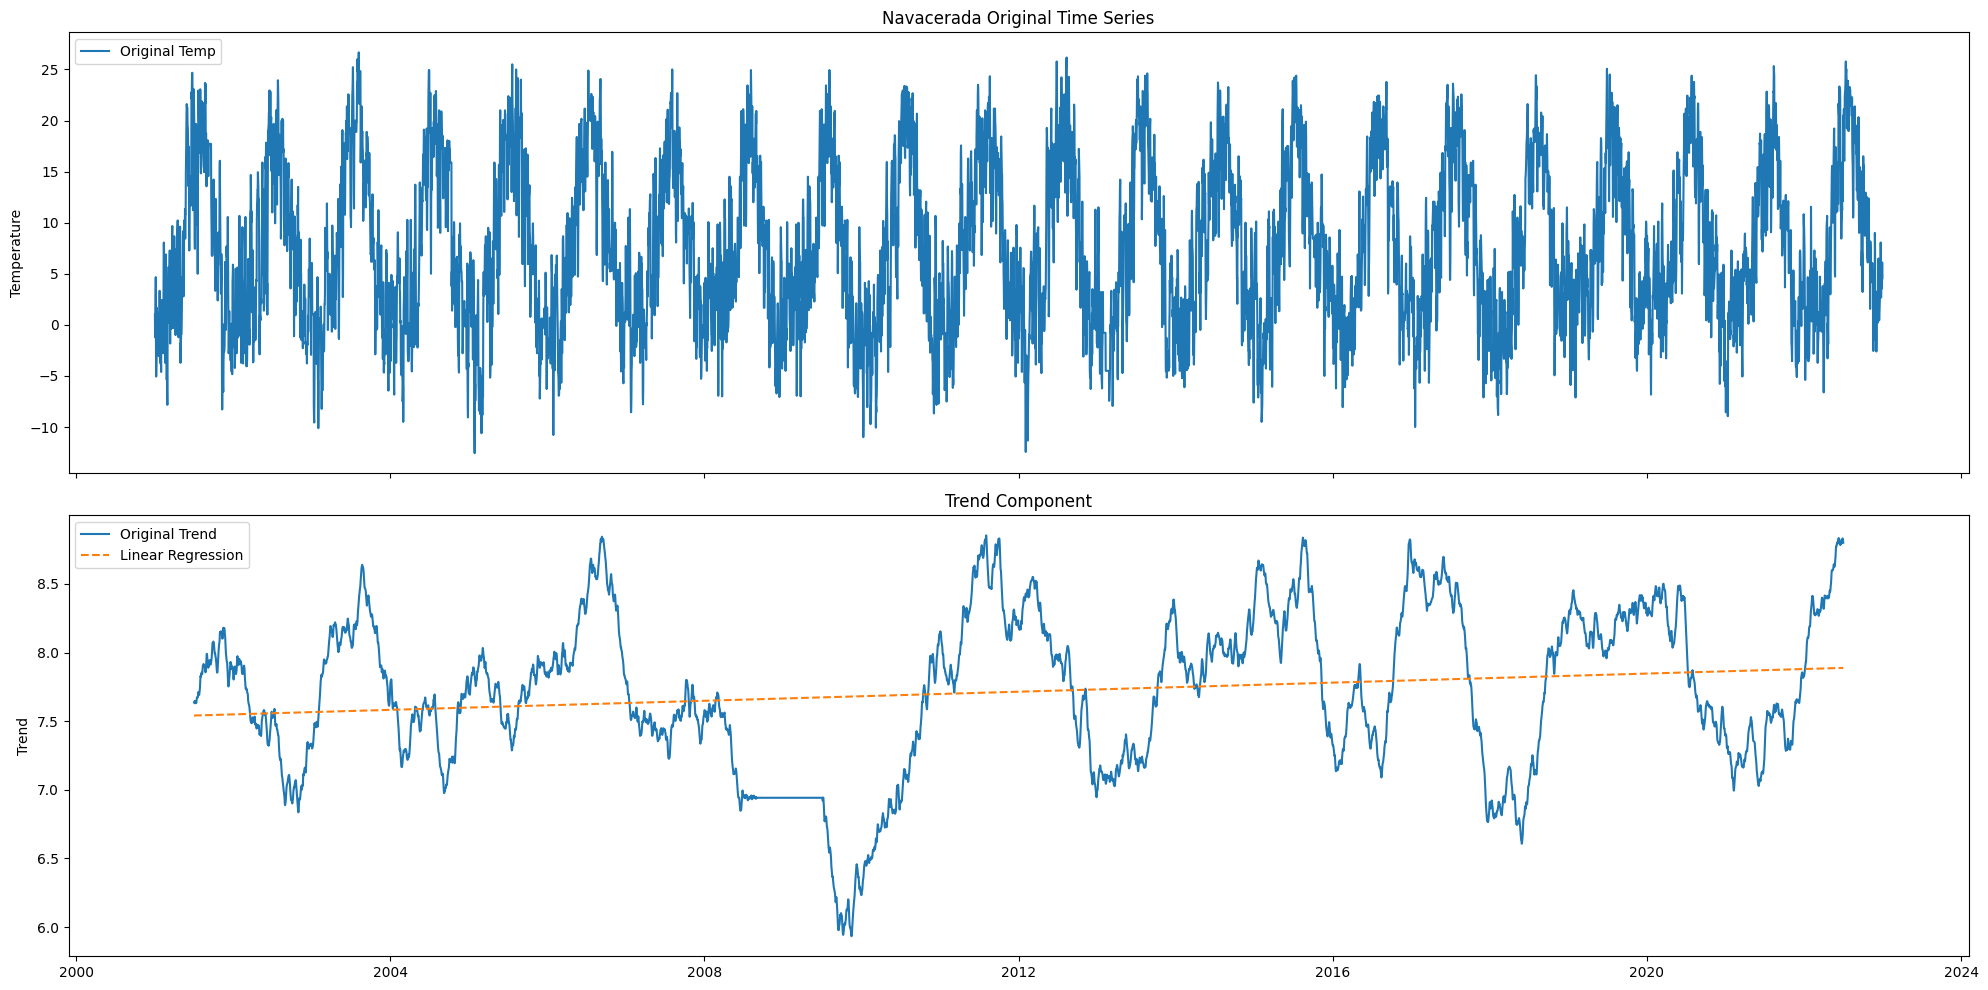

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

data = data_filled['TEMP_C'].copy()

# Perform seasonal decomposition on the stock price data (assuming no seasonality in this example)
decomposition = seasonal_decompose(data, model='additive', period=365)

# Fit a linear regression model to the trend component
trend = decomposition.trend.dropna()
X = np.arange(len(trend)).reshape(-1, 1)
y = trend.values

reg = LinearRegression().fit(X, y)

# Generate the predicted values using the fitted model
y_pred = reg.predict(X)
m = reg.coef_[0]
b = reg.intercept_

print(f"Slope (m): {m:.20f}")
print("Intercept (b):", b)
print(f"Average temperature increase in 10 years: {m*10*365}")

# another way
# X values (day indices)
x_values = np.arange(len(trend))
# Design matrix X
X = np.column_stack((np.ones(len(trend)), x_values))
# Calculate the pseudo-inverse of the design matrix X
X_pinv = np.linalg.pinv(X)
# Compute the model coefficients (b, m) by multiplying the pseudo-inverse of X by the target values y
b, m = np.dot(X_pinv, y)
print("Slope (m):", m)
print("Intercept (b):", b)

# another way
# Solving for m and b using the normal equations
x = np.arange(len(trend))
A = np.vstack([x, np.ones(len(x))]).T
m, b = np.linalg.lstsq(A, y, rcond=None)[0]
print("Slope (m):", m)
print("Intercept (b):", b)


# Create the plots using only matplotlib.pyplot
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot the original time series
axes[0].plot(data, label='Original Temp')
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Temperature')
axes[0].set_title(f'Navacerada Original Time Series')

# Plot the trend component
axes[1].plot(trend.index, trend, label='Original Trend')
axes[1].plot(trend.index, y_pred, label='Linear Regression', linestyle='--')
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Trend')
axes[1].set_title(f'Trend Component')


# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Perform the ADF test on the time series data
adf_test(data_filled['TEMP_C'])

ADF Statistic: -5.593335479737571
p-value: 1.3139026341509642e-06
Critical Values:
1%: -3.431166653791324
5%: -2.861900902523512
10%: -2.5669621037061976


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034],
      dtype='int64', length=8035)
2001-01-01    1.000000
2001-01-02   -1.219726
2001-01-03   -0.669452
2001-01-04    1.500821
2001-01-05    4.671095
                ...   
2022-12-27    6.588494
2022-12-28    6.088768
2022-12-29    5.759042
2022-12-30    8.309316
2022-12-31    6.759589
Freq: D, Length: 8035, dtype: float64
Slope (m): 0.00031901081188972390
Intercept (b): 7.591344369477663
Average temperature increase in 10 years: 1.1643894633974923


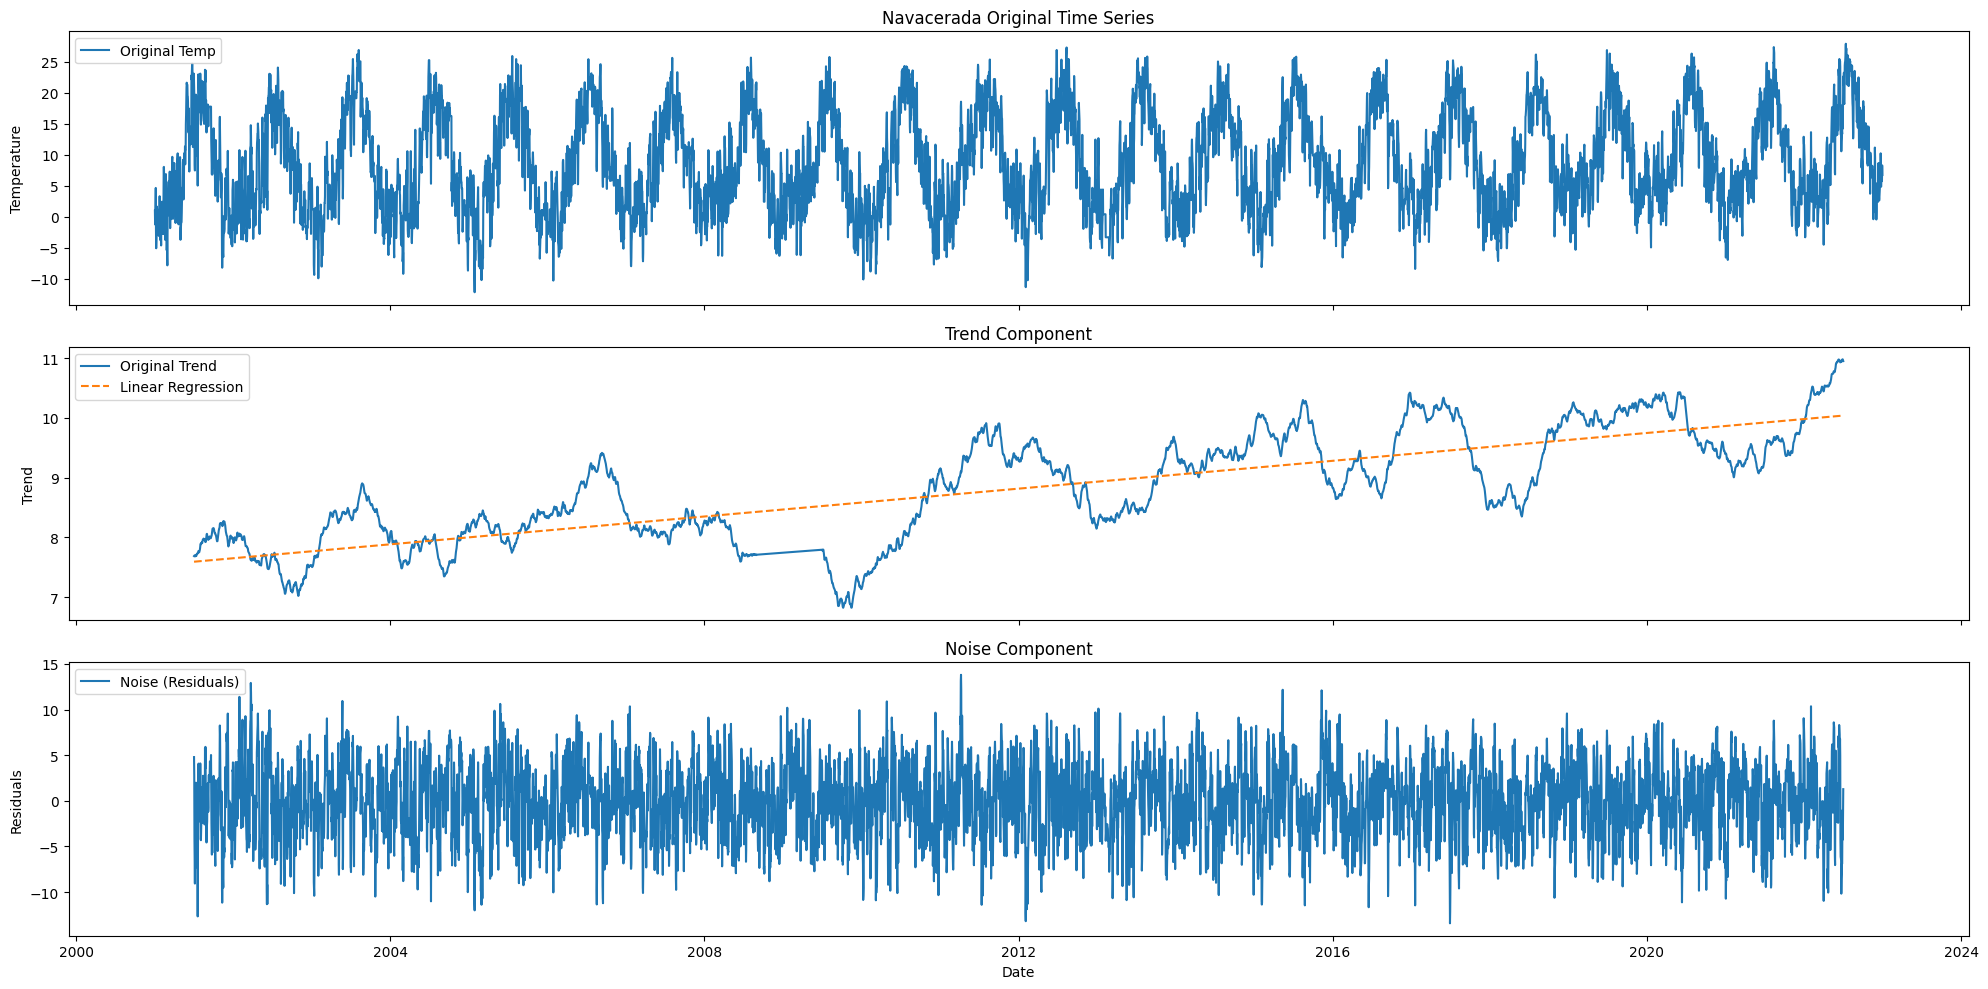

In [ ]:
data = data_filled['TEMP_C'].copy()

cheat_factor = 0.1

# Generate a range of years in your data
start_year = data.index.year.min()
end_year = data.index.year.max()

# Calculate the number of days from the start of the series to each day
days_from_start = (data.index - data.index.min()).days
print(days_from_start)

# Calculate the incremental increase for each day based on cheat factor
daily_increment = cheat_factor / 365.25  # Use 365.25 to account for leap years on average

# Create a series of cumulative increases
cumulative_increase = daily_increment * days_from_start

# Add the cumulative increase to the original data
data = data + cumulative_increase

print(data)

# Perform seasonal decomposition on the stock price data (assuming no seasonality in this example)
decomposition = seasonal_decompose(data, model='additive', period=365)


# Fit a linear regression model to the trend component
trend = decomposition.trend.dropna()
X = np.arange(len(trend)).reshape(-1, 1)
y = trend.values

reg = LinearRegression().fit(X, y)

# Generate the predicted values using the fitted model
y_pred = reg.predict(X)
m = reg.coef_[0]
b = reg.intercept_

print(f"Slope (m): {m:.20f}")
print("Intercept (b):", b)
print(f"Average temperature increase in 10 years: {m*10*365}")


# Create the plots using only matplotlib.pyplot
fig, axes = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# Plot the original time series
axes[0].plot(data, label='Original Temp')
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Temperature')
axes[0].set_title(f'Navacerada Original Time Series')

# Plot the trend component
axes[1].plot(trend.index, trend, label='Original Trend')
axes[1].plot(trend.index, y_pred, label='Linear Regression', linestyle='--')
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Trend')
axes[1].set_title(f'Trend Component')

# Plot the noise (residuals) component
axes[2].plot(decomposition.resid, label='Noise (Residuals)')
axes[2].legend(loc='upper left')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'Noise Component')

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Perform the ADF test on the time series data
adf_test(stock_data['Adj Close'])

ADF Statistic: -1.8889081956035871
p-value: 0.33729690139552104
Critical Values:
1%: -3.439052522969989
5%: -2.8653808299915013
10%: -2.5688152592363274
